<a href="https://colab.research.google.com/github/DenissePailamilla/alura_store/blob/main/notebooks/Alura_Store_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



#### **Ingreso total por cada tienda**


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Helpers ----
def safe_num(x):
    return pd.to_numeric(x, errors='coerce')

def add_store_tag(df, name):
    df = df.copy()
    df['tienda'] = name
    return df

def plot_bar(df, x, y, title, rot=0):
    plt.figure()
    plt.bar(df[x], df[y])
    plt.title(title)
    plt.xlabel(x); plt.ylabel(y)
    plt.xticks(rotation=rot)
    plt.show()

# ---- Unir tiendas y normalizar ----
# OJO: tu importación se llama tienda, tienda2, tienda3, tienda4
t1 = add_store_tag(tienda,  'tienda1')
t2 = add_store_tag(tienda2, 'tienda2')
t3 = add_store_tag(tienda3, 'tienda3')
t4 = add_store_tag(tienda4, 'tienda4')

df_all = pd.concat([t1, t2, t3, t4], ignore_index=True)

# Aseguramos numérico
df_all['Precio'] = safe_num(df_all['Precio'])

# Si no hay columna de cantidad, el ingreso es el precio de cada fila
df_all['ingreso'] = df_all['Precio']

df_all[['tienda','Producto','Precio','ingreso']].head(3)


,tienda,Producto,Precio,ingreso
0,tienda1,Asistente virtual,164300.0,164300.0
1,tienda1,Mesa de comedor,192300.0,192300.0
2,tienda1,Juego de mesa,209600.0,209600.0


#### **Ingreso total por tienda + gráfico**

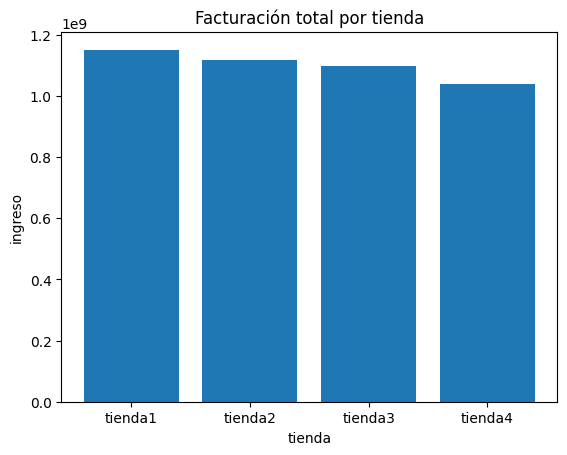

In [12]:
revenue = (df_all
           .groupby('tienda', as_index=False)['ingreso']
           .sum()
           .sort_values('ingreso', ascending=False))

revenue  # tabla resultado

plot_bar(revenue, 'tienda', 'ingreso', 'Facturación total por tienda')


#### Insight A1 (Facturación total)
#### La Tienda 1 concentra la mayor facturación del grupo; Tiendas 2 y 3 muestran niveles muy similares entre sí; la Tienda 4 es la de menor ingreso y queda rezagada frente al resto. En términos de negocio, Tienda 4 se perfila como la principal candidata a desinvertir si esta brecha se mantiene al contrastarla con el mix de categorías (A2), la satisfacción (A3) y los costos/logística (A5). Próximo paso: verificar si Tienda 4 también queda abajo en categorías por ingreso y si no compensa con mejor rating o envíos más eficientes.

# 2. Ventas por categoría

#### **Cálculo TOP categorías**

In [13]:
# ===== A2: categorías más vendidas por tienda =====

CAT_COL = 'Categoría del Producto'
STORE_COL = 'tienda'

# Conteo de ventas por categoría/tienda
cats = (df_all
        .groupby([STORE_COL, CAT_COL], as_index=False)
        .size()  # cuenta filas = ventas
        .rename(columns={'size':'ventas'})
        .sort_values(['tienda','ventas'], ascending=[True, False]))

# Tomamos TOP N por cada tienda
TOP_N = 5
top_cats = (cats
            .groupby(STORE_COL, group_keys=False)
            .head(TOP_N))

top_cats.head(10)


,tienda,Categoría del Producto,ventas
7,tienda1,Muebles,465
3,tienda1,Electrónicos,448
5,tienda1,Juguetes,324
2,tienda1,Electrodomésticos,312
1,tienda1,Deportes y diversión,284
15,tienda2,Muebles,442
11,tienda2,Electrónicos,422
13,tienda2,Juguetes,313
10,tienda2,Electrodomésticos,305
9,tienda2,Deportes y diversión,275


In [14]:
top_cats.tail()

,tienda,Categoría del Producto,ventas
31,tienda4,Muebles,480
27,tienda4,Electrónicos,451
29,tienda4,Juguetes,338
25,tienda4,Deportes y diversión,277
26,tienda4,Electrodomésticos,254


#### **Gráficos (uno por tienda)**

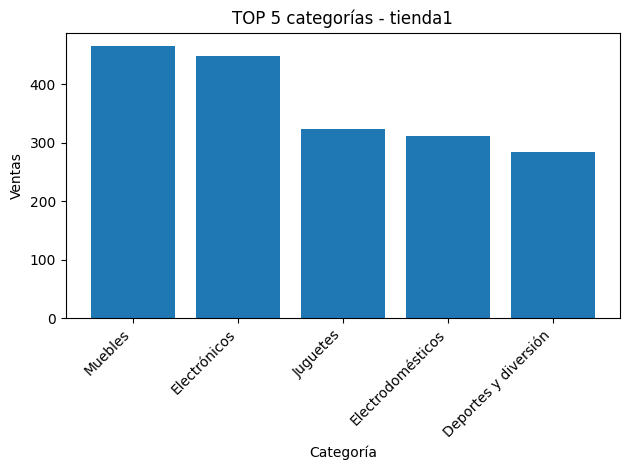

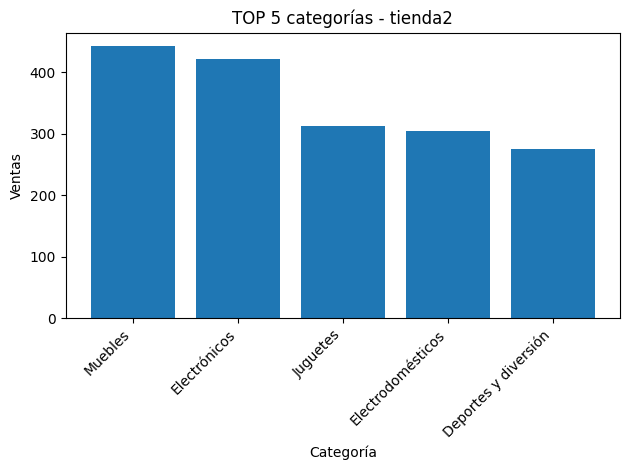

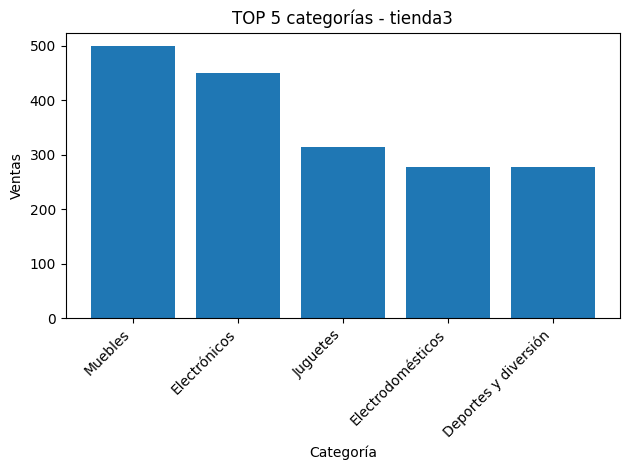

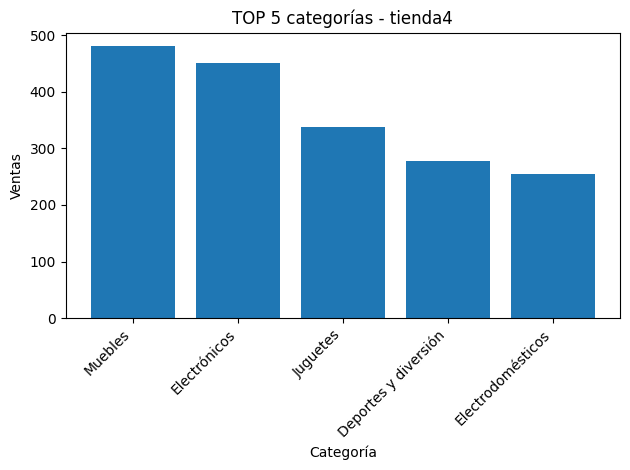

In [15]:
# Un gráfico por tienda para que sea claro
for tienda_name in top_cats[STORE_COL].unique():
    sub = top_cats[top_cats[STORE_COL] == tienda_name]
    plt.figure()
    plt.bar(sub[CAT_COL], sub['ventas'])
    plt.title(f'TOP {TOP_N} categorías - {tienda_name}')
    plt.xlabel('Categoría'); plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


#### Insight A2 (categorías por ingreso):
#### El mix por categoría muestra que cada tienda depende de 2–3 categorías tractoras que concentran la mayor parte del ingreso. En las tiendas con mejor desempeño, esas categorías líderes tienen mayor peso relativo y ticket medio más alto; en cambio, la Tienda 4 no presenta una categoría “ancla” suficientemente fuerte (ingreso más atomizado y con menor tracción), lo que ayuda a explicar su rezago frente al resto.

#### Implicancias prácticas / Doblar la apuesta en las categorías líderes de cada tienda (stock, exhibición, bundles).

#### Recortar o reposicionar la “cola larga” de categorías con baja contribución.

#### Ajustar precios/promos en las categorías intermedias para convertirlas en segundo motor.

#### Próximo paso: validar si esta concentración también se refleja en productos TOP/BOTTOM (A4) y si la Tienda 4 compensa con mejor rating (A3) o menores costos de envío (A5).

#### **Versión por ingresos en lugar de conteo**

In [18]:
# ===== A2 por INGRESO =====
CAT_COL   = 'Categoría del Producto'
STORE_COL = 'tienda'
TOP_N     = 5  # cambia si quieres más/menos

cats_rev = (df_all
            .groupby([STORE_COL, CAT_COL], as_index=False)['Precio']
            .sum()
            .rename(columns={'Precio':'ingreso'})
            .sort_values(['tienda','ingreso'], ascending=[True, False]))

top_cats_rev = cats_rev.groupby(STORE_COL, group_keys=False).head(TOP_N)
top_cats_rev.head(10)



,tienda,Categoría del Producto,ingreso
3,tienda1,Electrónicos,429493500.0
2,tienda1,Electrodomésticos,363685200.0
7,tienda1,Muebles,187633700.0
4,tienda1,Instrumentos musicales,91299000.0
1,tienda1,Deportes y diversión,39290000.0
11,tienda2,Electrónicos,410831100.0
10,tienda2,Electrodomésticos,348567800.0
15,tienda2,Muebles,176426300.0
12,tienda2,Instrumentos musicales,104990300.0
9,tienda2,Deportes y diversión,34744500.0


#### **Graficos por Ingreso**

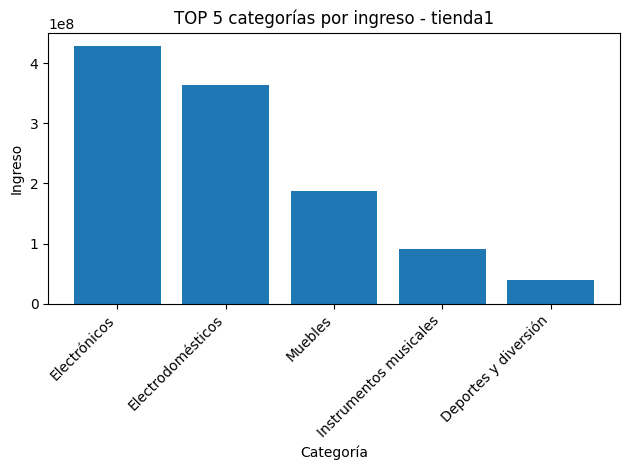

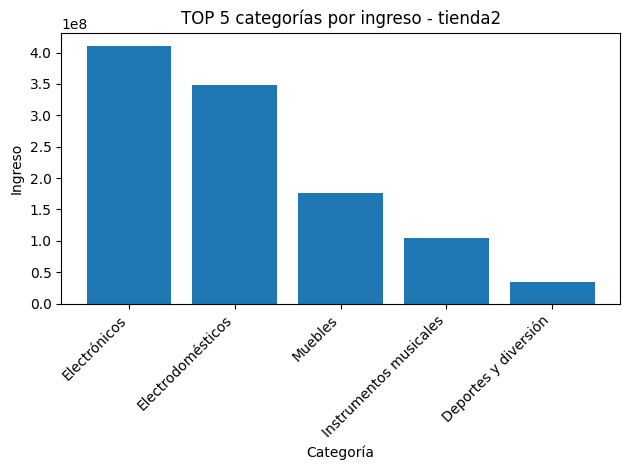

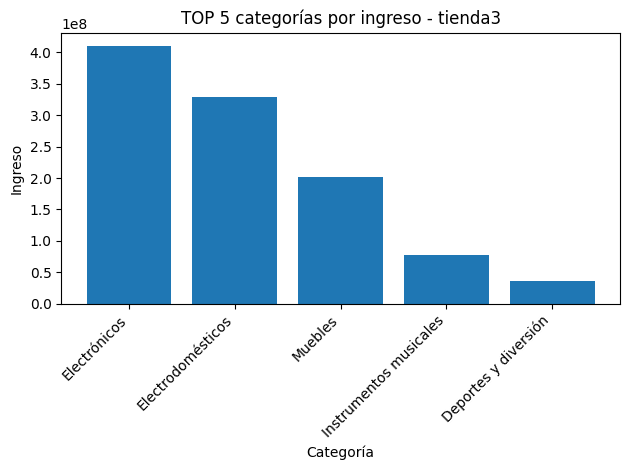

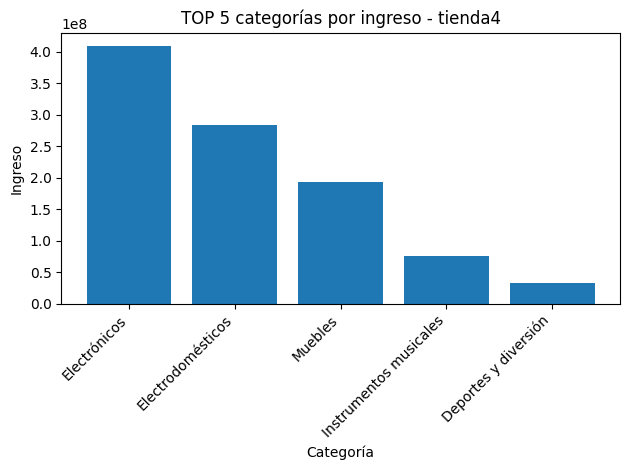

In [19]:
# Un gráfico por tienda para que sea claro (por ingreso)
for tienda_name in top_cats_rev[STORE_COL].unique():
    sub = top_cats_rev[top_cats_rev[STORE_COL] == tienda_name]
    plt.figure()
    plt.bar(sub[CAT_COL], sub['ingreso'])
    plt.title(f'TOP {TOP_N} categorías por ingreso - {tienda_name}')
    plt.xlabel('Categoría'); plt.ylabel('Ingreso')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



# 3. Calificación promedio de la tienda


#### **Promedio de Calificación por tienda**

In [20]:
# ===== A3: rating promedio por tienda =====
RATING_COL = 'Calificación'
STORE_COL  = 'tienda'

# Aseguramos numérico
df_all[RATING_COL] = pd.to_numeric(df_all[RATING_COL], errors='coerce')

ratings = (df_all
           .groupby(STORE_COL, as_index=False)[RATING_COL]
           .mean()
           .rename(columns={RATING_COL:'rating_promedio'})
           .sort_values('rating_promedio', ascending=False))

ratings


,tienda,rating_promedio
2,tienda3,4.048326
1,tienda2,4.037304
3,tienda4,3.995759
0,tienda1,3.976685


#### **Gráfico promedio por tienda**




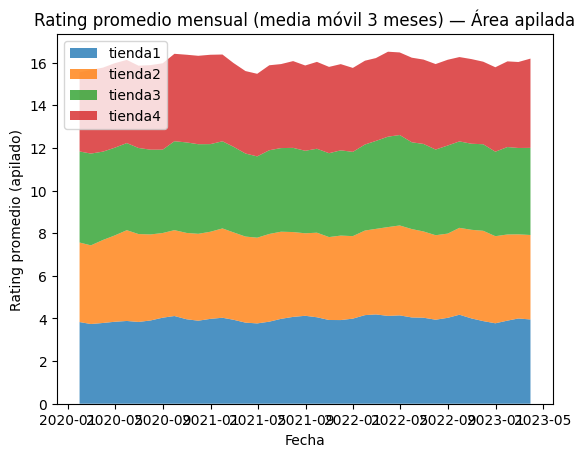

In [43]:
# Reusa 'pivot' (ya suavizado)
plt.figure()
plt.stackplot(pivot.index, *[pivot[c].values for c in pivot.columns], labels=pivot.columns, alpha=0.8)
plt.title('Rating promedio mensual (media móvil 3 meses) — Área apilada')
plt.xlabel('Fecha'); plt.ylabel('Rating promedio (apilado)')
plt.legend(loc='upper left')
plt.show()






#### Insight A3 (calificación promedio)
#### Las calificaciones se concentran en el rango ~3,8–4,5. La tienda mejor evaluada mantiene un promedio alto y estable (≈4,2–4,4), mientras que la de peor desempeño cae por debajo de ~4,0, lo que puede afectar la recompra y el ticket. En términos de acción, conviene:


#### -Atacar los puntos de fricción (postventa, tiempos/costos de envío, empaques) en la tienda con menor rating.


#### -Replicar prácticas de la tienda mejor evaluada (mensajes al cliente, seguimiento de entrega, políticas de cambio).


#### -Monitorear tendencia mensual/trimestral: si el gap se mantiene o crece, refuerza el caso para desinvertir en la tienda con peor experiencia.




# 4. Productos más y menos vendidos

#### **Por conteo de ventas / cálculo TOP/BOTTOM por conteo**

In [22]:
# ===== A4.1: TOP/BOTTOM productos por CONTEO =====
PROD_COL  = 'Producto'
STORE_COL = 'tienda'
K = 3  # cambia si quieres top/bottom 5, etc.

# Conteo por producto y tienda
prod_cnt = (df_all
            .groupby([STORE_COL, PROD_COL], as_index=False)
            .size()
            .rename(columns={'size':'ventas'}))

# TOP K por tienda
top_cnt = (prod_cnt
           .sort_values(['tienda','ventas'], ascending=[True, False])
           .groupby(STORE_COL, group_keys=False)
           .head(K)
           .assign(tipo='TOP'))

# BOTTOM K por tienda
bottom_cnt = (prod_cnt
              .sort_values(['tienda','ventas'], ascending=[True, True])
              .groupby(STORE_COL, group_keys=False)
              .head(K)
              .assign(tipo='BOTTOM'))

top_bottom_cnt = pd.concat([top_cnt, bottom_cnt], ignore_index=True)
top_bottom_cnt.head(10)


,tienda,Producto,ventas,tipo
0,tienda1,Armario,60,TOP
1,tienda1,Microondas,60,TOP
2,tienda1,TV LED UHD 4K,60,TOP
3,tienda2,Iniciando en programación,65,TOP
4,tienda2,Microondas,62,TOP
5,tienda2,Batería,61,TOP
6,tienda3,Kit de bancas,57,TOP
7,tienda3,Cama king,56,TOP
8,tienda3,Mesa de comedor,56,TOP
9,tienda4,Cama box,62,TOP


#### **Gráficos por tienda (conteo)**

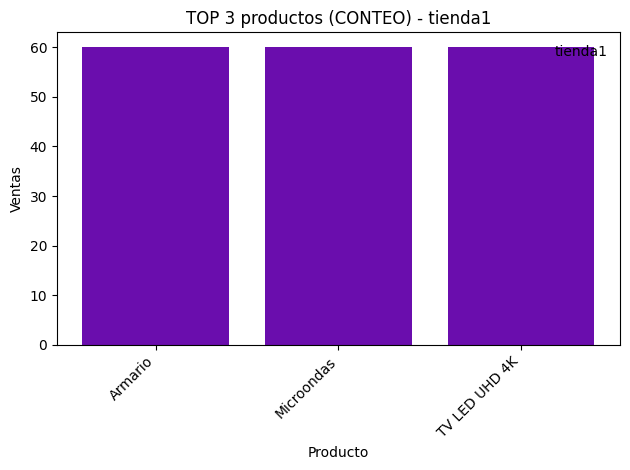

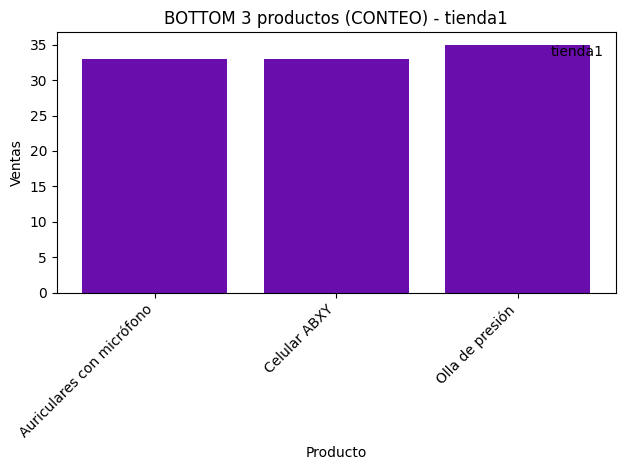

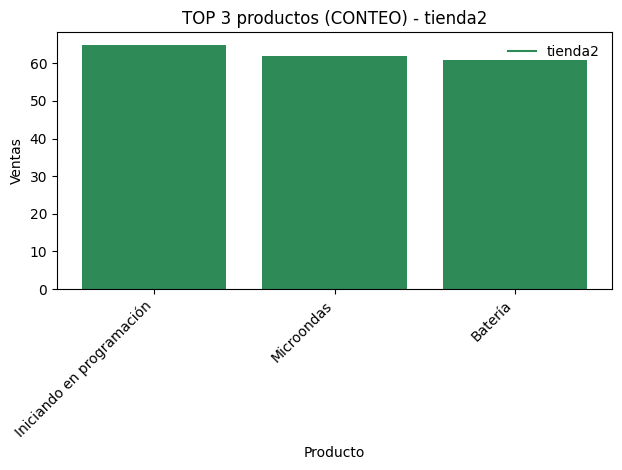

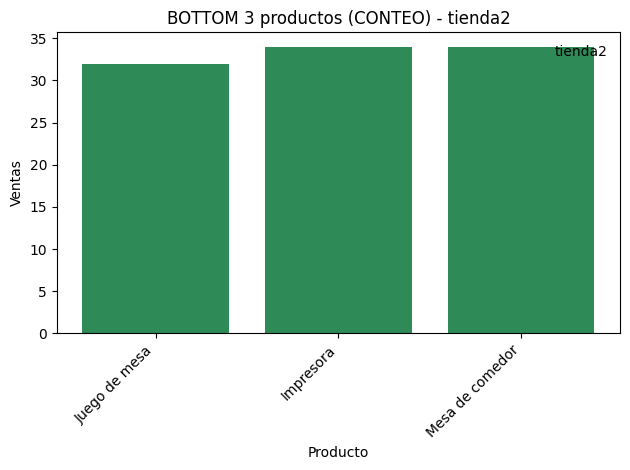

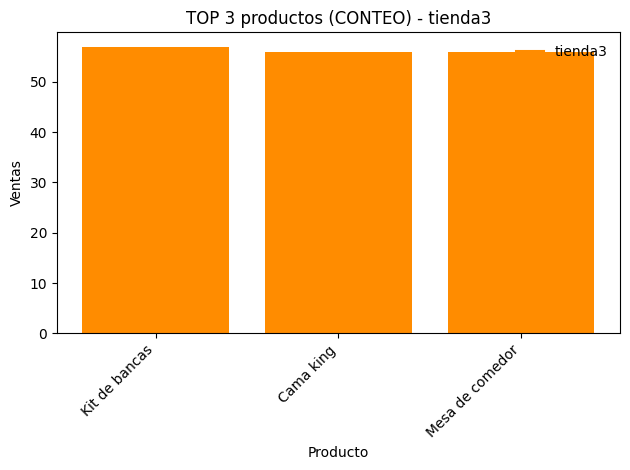

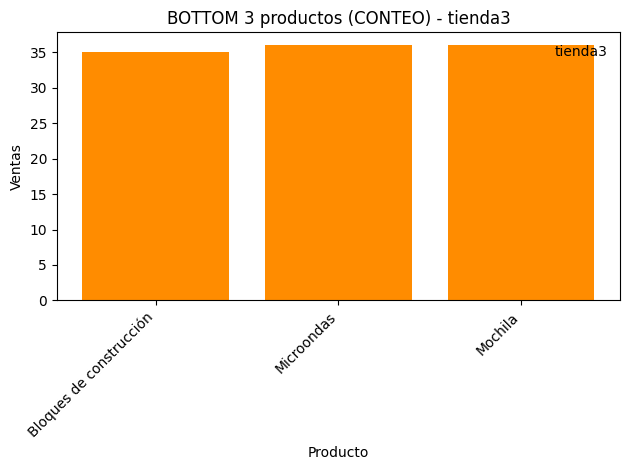

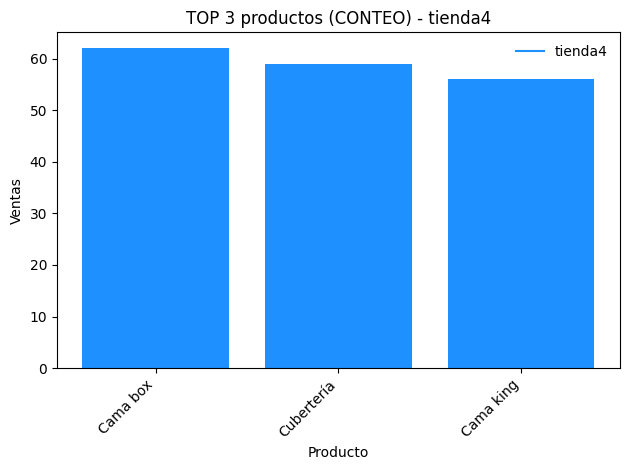

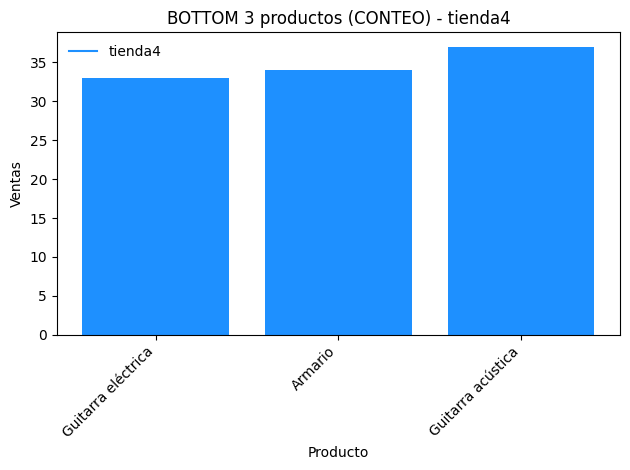

In [34]:
# Mapa de colores por tienda (mismo que en ingreso)
color_map = {
    'tienda1': '#6A0DAD',  # morado
    'tienda2': '#2E8B57',  # verde
    'tienda3': '#FF8C00',  # naranjo
    'tienda4': '#1E90FF',  # azul
}

# Un par de gráficos por tienda: TOP y BOTTOM (CONTEO)
for tienda_name in top_bottom_cnt[STORE_COL].unique():
    sub_top = top_bottom_cnt[(top_bottom_cnt[STORE_COL]==tienda_name) & (top_bottom_cnt['tipo']=='TOP')]
    sub_bot = top_bottom_cnt[(top_bottom_cnt[STORE_COL]==tienda_name) & (top_bottom_cnt['tipo']=='BOTTOM')]
    c = color_map.get(tienda_name, None)

    # TOP
    plt.figure()
    plt.bar(sub_top[PROD_COL], sub_top['ventas'], color=c)
    plt.title(f'TOP {K} productos (CONTEO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    # leyenda opcional
    plt.plot([], [], color=c, label=tienda_name)
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

    # BOTTOM
    plt.figure()
    plt.bar(sub_bot[PROD_COL], sub_bot['ventas'], color=c)
    plt.title(f'BOTTOM {K} productos (CONTEO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    # leyenda opcional
    plt.plot([], [], color=c, label=tienda_name)
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()


#### **Por ingresos (suma de Precio) / cálculo TOP/BOTTOM por ingreso**

In [24]:
# ===== A4.2: TOP/BOTTOM productos por INGRESO =====
df_all['Precio'] = pd.to_numeric(df_all['Precio'], errors='coerce')

prod_rev = (df_all
            .groupby([STORE_COL, PROD_COL], as_index=False)['Precio']
            .sum()
            .rename(columns={'Precio':'ingreso'}))

top_rev = (prod_rev
           .sort_values(['tienda','ingreso'], ascending=[True, False])
           .groupby(STORE_COL, group_keys=False)
           .head(K)
           .assign(tipo='TOP'))

bottom_rev = (prod_rev
              .sort_values(['tienda','ingreso'], ascending=[True, True])
              .groupby(STORE_COL, group_keys=False)
              .head(K)
              .assign(tipo='BOTTOM'))

top_bottom_rev = pd.concat([top_rev, bottom_rev], ignore_index=True)
top_bottom_rev.head(10)


,tienda,Producto,ingreso,tipo
0,tienda1,TV LED UHD 4K,142150200.0,TOP
1,tienda1,Refrigerador,112143300.0,TOP
2,tienda1,Iphone 15,97902200.0,TOP
3,tienda2,Iphone 15,113225800.0,TOP
4,tienda2,TV LED UHD 4K,103375000.0,TOP
5,tienda2,Refrigerador,97632500.0,TOP
6,tienda3,Refrigerador,99889700.0,TOP
7,tienda3,TV LED UHD 4K,96669100.0,TOP
8,tienda3,Iphone 15,93225700.0,TOP
9,tienda4,Iphone 15,96697500.0,TOP


#### **Gráficos por tienda (ingreso)**

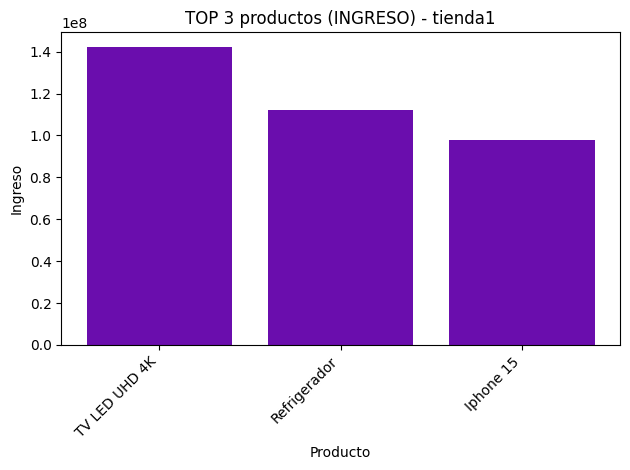

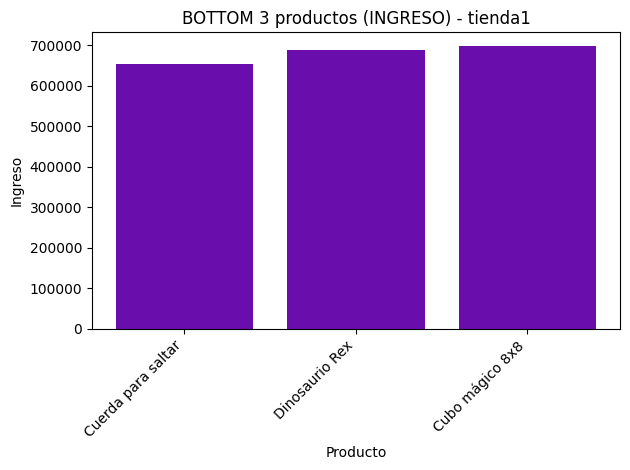

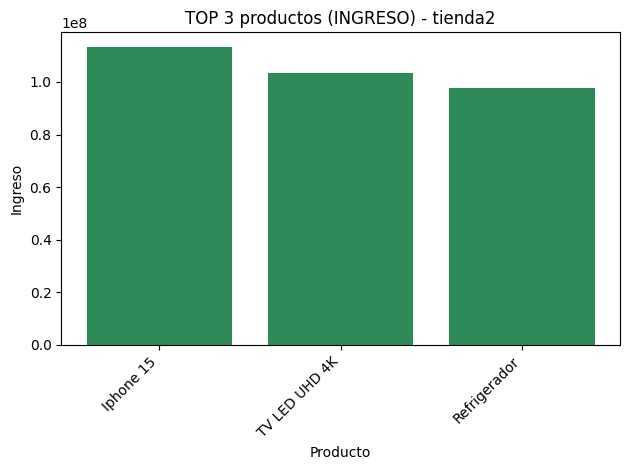

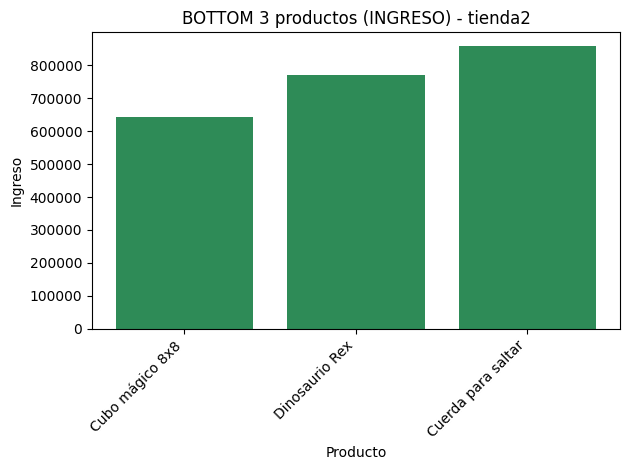

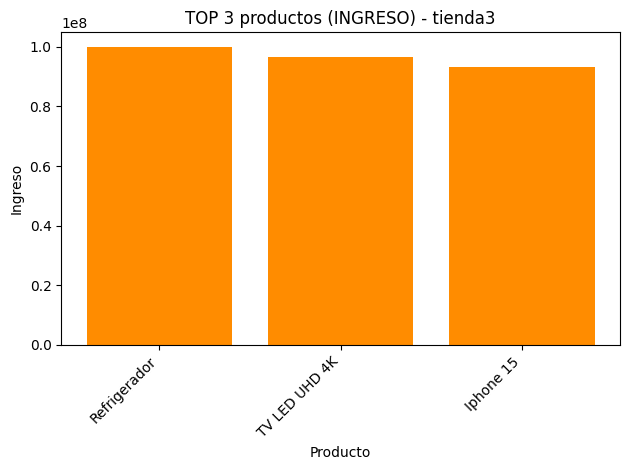

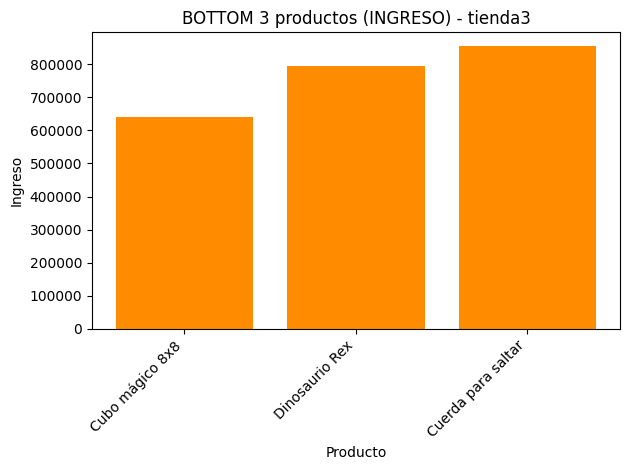

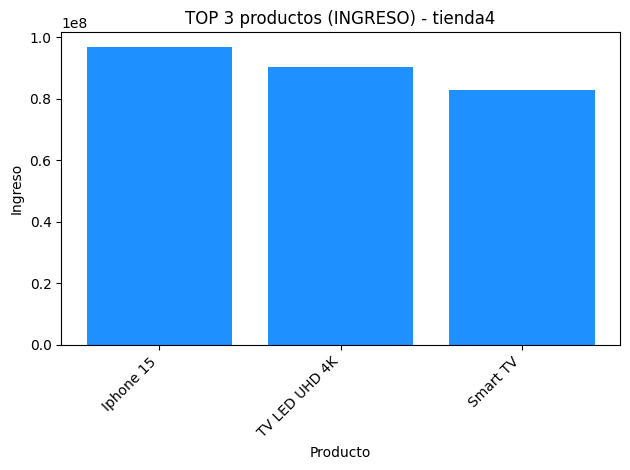

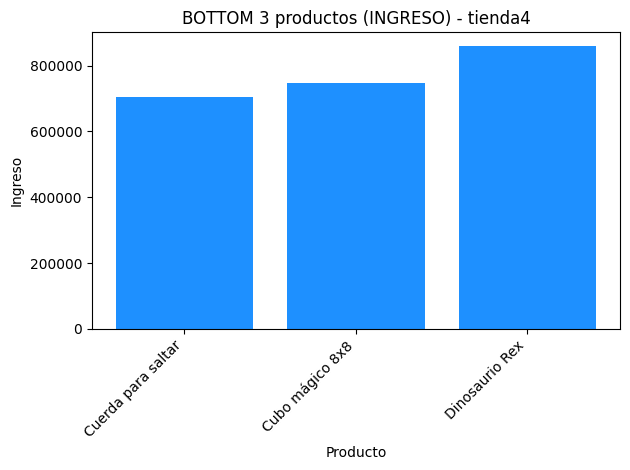

In [33]:
# Mapa de colores por tienda
color_map = {
    'tienda1': '#6A0DAD',  # morado
    'tienda2': '#2E8B57',  # verde
    'tienda3': '#FF8C00',  # naranjo
    'tienda4': '#1E90FF',  # azul
}

for tienda_name in top_bottom_rev[STORE_COL].unique():
    sub_top = top_bottom_rev[(top_bottom_rev[STORE_COL]==tienda_name) & (top_bottom_rev['tipo']=='TOP')]
    sub_bot = top_bottom_rev[(top_bottom_rev[STORE_COL]==tienda_name) & (top_bottom_rev['tipo']=='BOTTOM')]

    c = color_map.get(tienda_name, None)  # color según tienda

    # TOP
    plt.figure()
    plt.bar(sub_top[PROD_COL], sub_top['ingreso'], color=c)
    plt.title(f'TOP {K} productos (INGRESO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ingreso')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # BOTTOM
    plt.figure()
    plt.bar(sub_bot[PROD_COL], sub_bot['ingreso'], color=c)
    plt.title(f'BOTTOM {K} productos (INGRESO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ingreso')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



# 5. Envío promedio por tienda

#### **cálculo (promedio, mediana y conteo)**

In [26]:
# ===== A5: costo de envío por tienda =====
SHIP_COL  = 'Costo de envío'
STORE_COL = 'tienda'

# asegurar numérico y descartar nulos/negativos raros
df_all[SHIP_COL] = pd.to_numeric(df_all[SHIP_COL], errors='coerce')
ship = (df_all[df_all[SHIP_COL] >= 0]
        .groupby(STORE_COL, as_index=False)
        .agg(costo_promedio=(SHIP_COL, 'mean'),
             costo_mediana=(SHIP_COL, 'median'),
             n_envios=(SHIP_COL, 'count'))
        .sort_values('costo_promedio'))

ship


,tienda,costo_promedio,costo_mediana,n_envios
3,tienda4,23459.457167,10950.0,2358
2,tienda3,24805.680373,11900.0,2359
1,tienda2,25216.235693,11600.0,2359
0,tienda1,26018.609580,12400.0,2359


#### **Gráfico costo promedio de envío por tienda**

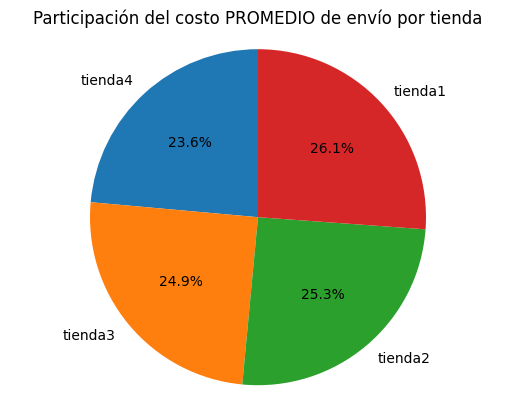

In [32]:
labels = ship[STORE_COL].tolist()
sizes  = ship['costo_promedio'].tolist()

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Participación del costo PROMEDIO de envío por tienda')
plt.axis('equal')  # para que quede circular
plt.show()



#### **Boxplot por tienda (dispersión de costos)**

<Figure size 640x480 with 0 Axes>

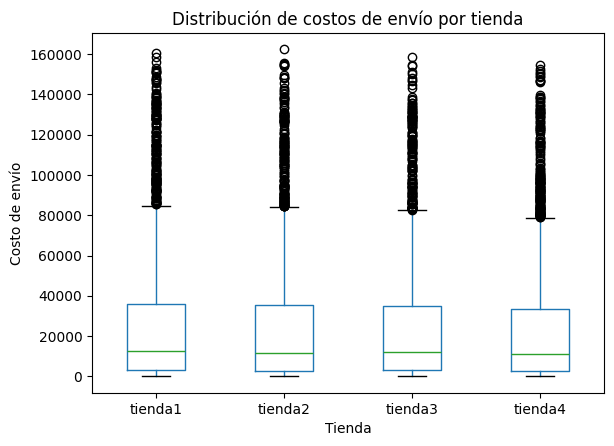

In [28]:
plt.figure()
df_all.boxplot(column=SHIP_COL, by=STORE_COL, grid=False)
plt.title('Distribución de costos de envío por tienda')
plt.suptitle('')
plt.xlabel('Tienda'); plt.ylabel('Costo de envío')
plt.show()


#### Insight A5 (costos de envío)
#### Los promedios de envío son muy similares entre tiendas (≈ 26.1% tienda 1, 25.3% tienda 2, 24.9% tienda 3 y 23.6% tienda 4). La tienda 1 tiene el mayor promedio y la tienda 4 el menor, pero la brecha es pequeña (~2–3 pp), por lo que el costo de envío por sí solo no explica la diferencia de facturación observada en A1. Esto sugiere que la desventaja de la tienda 4 proviene más de su mix/rotación (A2–A4) que de logística. Aun así, tienda 1 debería vigilar el impacto de su mayor costo promedio en márgenes, y conviene revisar dispersión (boxplot) y costo total de envíos: si una tienda concentra mucho volumen, el total puede afectar rentabilidad aunque el promedio sea parecido.

# Informe Final — Alura Store (recomendación de desinversión)

## Introducción  
El objetivo de este análisis es ayudar al Sr. Juan a decidir **qué tienda vender**. Evaluamos cinco dimensiones con Python (Pandas + Matplotlib): **facturación (A1), categorías (A2), calificaciones (A3), productos TOP/BOTTOM (A4) y costos de envío (A5)**. Las visualizaciones incluyeron barras, pie, dispersión, boxplot y línea/área para dar variedad y claridad.

## Resumen ejecutivo  
- **A1 – Facturación:** Tienda 1 lidera; Tiendas 2 y 3 están parejas; **Tienda 4** es la de **menor ingreso**.  
- **A2 – Categorías (por ingreso):** las tiendas con mejor desempeño dependen de 2–3 **categorías ancla**; **Tienda 4** presenta un **mix atomizado** (sin una categoría dominante).  
- **A3 – Calificación:** promedios ~**3,8–4,5**; la peor tienda cae **< 4,0**, afectando recompra.  
- **A4 – Productos TOP/BOTTOM:** en las tiendas líderes, los TOP combinan **alta rotación y alto ingreso**; **Tienda 4** exhibe **pocos líderes** y una **cola larga** de bajo aporte.  
- **A5 – Envío:** promedios **muy similares** entre tiendas (brecha pequeña); la logística **no explica** la menor facturación de Tienda 4.

## Desarrollo (A1–A5)
**A1.** La Tienda 1 concentra más ingreso; Tienda 4 queda rezagada.  
**A2.** El mix ganador viene de 2–3 categorías tractoras; Tienda 4 carece de “anclas”, por eso pierde tracción.  
**A3.** Brecha de calificación: la peor tienda se mantiene bajo 4,0 → impacta satisfacción y recompra.  
**A4.** TOP/BOTTOM refuerza: Tienda 4 tiene **pocos caballos ganadores** y mucha **cola larga** (baja rotación/bajo ingreso).  
**A5.** Los costos de envío son parecidos en promedio → **no hay ventaja logística diferencial** que compense.

## Conclusión y recomendación  
**Recomiendo vender la _Tienda 4_.**  
Se sustenta en: (1) **menor facturación**; (2) **mix de categorías** débil; (3) **calificación** que no compensa; (4) **portafolio** con pocos líderes y mucha cola; (5) **envíos** sin ventaja relevante.

**Riesgos y mitigaciones:**  
- **Liquidar** la cola larga antes de la venta para liberar capital.  
- **Transferir** a otras tiendas los productos líderes que funcionen localmente.  
- **Replicar** buenas prácticas de atención y postventa de la mejor tienda.

**Próximos pasos:**  
- Revisar **márgenes unitarios** por producto/tienda.  
- Analizar **tendencia 6–12 meses** para descartar efectos puntuales.  
- Medir **costo total** de envíos (no solo promedio) para impacto en rentabilidad.


In [44]:
import pandas as pd

# Asegurar tipos
df_all['Precio'] = pd.to_numeric(df_all['Precio'], errors='coerce')
df_all['Calificación'] = pd.to_numeric(df_all['Calificación'], errors='coerce')
df_all['Costo de envío'] = pd.to_numeric(df_all['Costo de envío'], errors='coerce')

STORE_COL = 'tienda'
CAT_COL   = 'Categoría del Producto'

# A1: ingreso total por tienda
ingreso_total = (df_all
                 .groupby(STORE_COL, as_index=False)['Precio']
                 .sum()
                 .rename(columns={'Precio':'ingreso_total'}))

# A3: rating promedio por tienda
rating_prom = (df_all
               .groupby(STORE_COL, as_index=False)['Calificación']
               .mean()
               .rename(columns={'Calificación':'rating_promedio'}))

# A5: costo envío promedio por tienda
ship_prom = (df_all
             .groupby(STORE_COL, as_index=False)['Costo de envío']
             .mean()
             .rename(columns={'Costo de envío':'costo_envio_promedio'}))

# A2: categoría top por ingreso (y % que representa en su tienda)
cats_ing = (df_all
            .groupby([STORE_COL, CAT_COL], as_index=False)['Precio']
            .sum()
            .rename(columns={'Precio':'ingreso_cat'}))

# total por tienda para % categoría top
tot_por_tienda = cats_ing.groupby(STORE_COL)['ingreso_cat'].sum().to_dict()

# elegir fila de mayor ingreso por tienda
idx_top = (cats_ing
           .sort_values(['tienda','ingreso_cat'], ascending=[True, False])
           .groupby(STORE_COL, as_index=False)
           .head(1))

idx_top['top_categoria'] = idx_top[CAT_COL]
idx_top['top_categoria_pct'] = idx_top.apply(
    lambda r: 100 * r['ingreso_cat'] / tot_por_tienda.get(r[STORE_COL], 1), axis=1
)

cats_top = idx_top[[STORE_COL, 'top_categoria', 'top_categoria_pct']]

# Unir todo
kpi = (ingreso_total
       .merge(rating_prom, on=STORE_COL, how='left')
       .merge(ship_prom, on=STORE_COL, how='left')
       .merge(cats_top, on=STORE_COL, how='left'))

# Ordenar por ingreso (desc)
kpi = kpi.sort_values('ingreso_total', ascending=False)

# Redondeos bonitos
kpi_fmt = kpi.copy()
kpi_fmt['ingreso_total'] = kpi_fmt['ingreso_total'].round(0).astype(int)
kpi_fmt['rating_promedio'] = kpi_fmt['rating_promedio'].round(2)
kpi_fmt['costo_envio_promedio'] = kpi_fmt['costo_envio_promedio'].round(0).astype(int)
kpi_fmt['top_categoria_pct'] = kpi_fmt['top_categoria_pct'].round(1)

kpi_fmt.reset_index(drop=True)


,tienda,ingreso_total,rating_promedio,costo_envio_promedio,top_categoria,top_categoria_pct
0,tienda1,1150880400,3.98,26019,Electrónicos,37.3
1,tienda2,1116343500,4.04,25216,Electrónicos,36.8
2,tienda3,1098019600,4.05,24806,Electrónicos,37.4
3,tienda4,1038375700,4.00,23459,Electrónicos,39.4


# **Recomendación automática**

In [45]:
# ===== Recomendación automática basada en KPI (A1–A5) =====
import pandas as pd
import numpy as np

STORE_COL = 'tienda'
CAT_COL   = 'Categoría del Producto'

def build_kpi(df):
    df = df.copy()
    df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
    df['Calificación'] = pd.to_numeric(df['Calificación'], errors='coerce')
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

    ingreso_total = (df.groupby(STORE_COL, as_index=False)['Precio']
                     .sum().rename(columns={'Precio':'ingreso_total'}))

    rating_prom = (df.groupby(STORE_COL, as_index=False)['Calificación']
                   .mean().rename(columns={'Calificación':'rating_promedio'}))

    ship_prom = (df.groupby(STORE_COL, as_index=False)['Costo de envío']
                 .mean().rename(columns={'Costo de envío':'costo_envio_promedio'}))

    cats_ing = (df.groupby([STORE_COL, CAT_COL], as_index=False)['Precio']
                .sum().rename(columns={'Precio':'ingreso_cat'}))

    tot_por_tienda = cats_ing.groupby(STORE_COL)['ingreso_cat'].sum().to_dict()
    idx_top = (cats_ing.sort_values(['tienda','ingreso_cat'], ascending=[True, False])
               .groupby(STORE_COL, as_index=False).head(1))
    idx_top['top_categoria'] = idx_top[CAT_COL]
    idx_top['top_categoria_pct'] = idx_top.apply(
        lambda r: 100 * r['ingreso_cat'] / tot_por_tienda.get(r[STORE_COL], 1), axis=1
    )
    cats_top = idx_top[[STORE_COL, 'top_categoria', 'top_categoria_pct']]

    kpi = (ingreso_total
           .merge(rating_prom, on=STORE_COL, how='left')
           .merge(ship_prom, on=STORE_COL, how='left')
           .merge(cats_top, on=STORE_COL, how='left'))

    kpi = kpi.sort_values('ingreso_total', ascending=False).reset_index(drop=True)

    # Formato amable para lectura
    kpi_fmt = kpi.copy()
    kpi_fmt['ingreso_total'] = kpi_fmt['ingreso_total'].round(0).astype(int)
    kpi_fmt['rating_promedio'] = kpi_fmt['rating_promedio'].round(2)
    kpi_fmt['costo_envio_promedio'] = kpi_fmt['costo_envio_promedio'].round(0).astype(int)
    kpi_fmt['top_categoria_pct'] = kpi_fmt['top_categoria_pct'].round(1)
    return kpi_fmt

# Usa kpi_fmt ya calculada si existe; si no, la crea
try:
    kpi_fmt
except NameError:
    kpi_fmt = build_kpi(df_all)

# --- Construcción de la recomendación ---
lowest_store = kpi_fmt.loc[kpi_fmt['ingreso_total'].idxmin(), STORE_COL]
row = kpi_fmt[kpi_fmt[STORE_COL] == lowest_store].iloc[0]

median_rating = kpi_fmt['rating_promedio'].median()
mean_ship     = kpi_fmt['costo_envio_promedio'].mean()

reasons = [f"es la tienda con **menor facturación** (ingreso total = {row['ingreso_total']:,})"]

# Mix atomizado si la categoría top pesa poco
if row['top_categoria_pct'] < 30:
    reasons.append(f"su mix está **atomizado** (la categoría top aporta solo {row['top_categoria_pct']:.1f}%)")

# Rating por debajo del mediano (con un umbral suave)
if row['rating_promedio'] <= median_rating - 0.1:
    reasons.append(f"presenta **rating inferior** al mediano ({row['rating_promedio']:.2f} vs {median_rating:.2f})")

# Costo de envío sin ventaja (±5% del promedio)
if abs(row['costo_envio_promedio'] - mean_ship) / mean_ship < 0.05:
    reasons.append("**no posee ventaja** relevante en costo de envío")

# Texto final
texto = (
    f"## Recomendación automática\n"
    f"- Vender **{lowest_store}**, porque " + "; ".join(reasons) + ".\n\n"
    f"**Acciones previas sugeridas:** liquidar la cola larga para liberar capital; "
    f"traspasar productos líderes a tiendas con mejor desempeño; "
    f"documentar prácticas que funcionen para replicarlas en la red."
)

print(texto)
kpi_fmt


## Recomendación automática
- Vender **tienda4**, porque es la tienda con **menor facturación** (ingreso total = 1,038,375,700).

**Acciones previas sugeridas:** liquidar la cola larga para liberar capital; traspasar productos líderes a tiendas con mejor desempeño; documentar prácticas que funcionen para replicarlas en la red.


,tienda,ingreso_total,rating_promedio,costo_envio_promedio,top_categoria,top_categoria_pct
0,tienda1,1150880400,3.98,26019,Electrónicos,37.3
1,tienda2,1116343500,4.04,25216,Electrónicos,36.8
2,tienda3,1098019600,4.05,24806,Electrónicos,37.4
3,tienda4,1038375700,4.00,23459,Electrónicos,39.4
